# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os
import PIL #Python Imaging Library

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import pathlib

from sklearn.model_selection import train_test_split

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', cache_dir='.', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir) # Convert data dir to a windows path 

In [4]:
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
img_count = len(list(data_dir.glob('*/*.jpg'))) # list of all jpg files
img_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

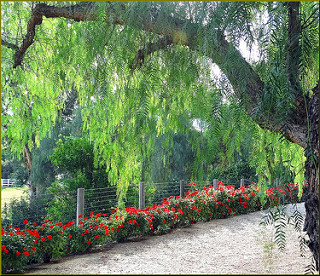

In [7]:
PIL.Image.open(str(roses[5]))

In [8]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [10]:
img = cv2.imread(str(flower_images_dict['roses'][0])) # open cv2 read the image 
                                                      # from the file path and converts it to 3D array

In [11]:
img.shape

(240, 179, 3)

In [12]:
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [13]:
X,  y = [] ,[]
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
    

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
len(X_train)

2752

In [18]:
len(X_test)

918

In [19]:
X_train_scaled = X_train/ 255
X_test_scaled = X_test/ 255

In [20]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),  
    layers.Conv2D(32, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
        ])




In [21]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(X_train_scaled,y_train, epochs=5)

Epoch 1/5


c:\Users\JTRICKZZ\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 31s 344ms/step - loss: 1.3386 - accuracy: 0.4237
Epoch 2/5
86/86 [==============================] - 32s 377ms/step - loss: 0.9927 - accuracy: 0.6130
Epoch 3/5
86/86 [==============================] - 32s 367ms/step - loss: 0.7824 - accuracy: 0.7057
Epoch 4/5
86/86 [==============================] - 32s 378ms/step - loss: 0.5716 - accuracy: 0.7918
Epoch 5/5
86/86 [==============================] - 29s 341ms/step - loss: 0.3508 - accuracy: 0.8772


In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 3s 94ms/step


array([[1.01806084e-02, 9.88960803e-01, 4.10358509e-04, 1.86753951e-07,
        4.48047358e-04],
       [9.71229017e-01, 1.05281430e-03, 1.87552268e-05, 1.04720602e-05,
        2.76889596e-02],
       [3.18024354e-03, 8.26354548e-02, 9.11691844e-01, 1.32099449e-04,
        2.36032438e-03],
       ...,
       [1.86771989e-01, 3.95112578e-03, 7.06398219e-04, 1.80215254e-01,
        6.28355205e-01],
       [1.35991961e-01, 9.15458649e-02, 2.32352391e-01, 2.19424646e-02,
        5.18167257e-01],
       [1.13078825e-01, 4.77649155e-04, 2.65785158e-01, 2.86468506e-01,
        3.34189862e-01]], dtype=float32)

In [24]:
predictions[0]

array([1.0180608e-02, 9.8896080e-01, 4.1035851e-04, 1.8675395e-07,
       4.4804736e-04], dtype=float32)

In [42]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

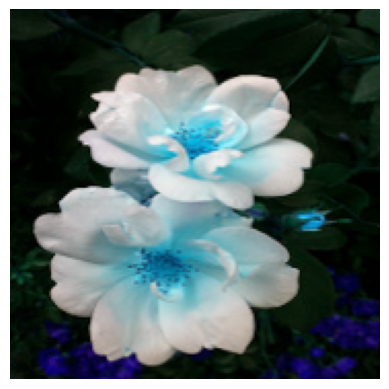

In [29]:
plt.axis('off')
plt.imshow(X[0])

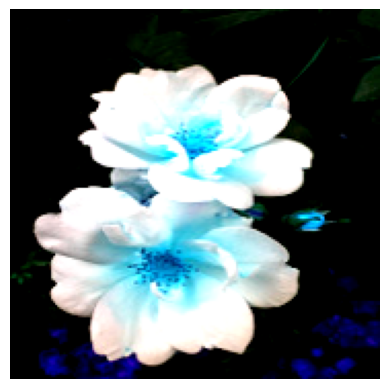

In [41]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [45]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),  
    layers.Conv2D(32, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
        ])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(X_train_scaled,y_train, epochs=10)


Epoch 1/10
86/86 [==============================] - 37s 377ms/step - loss: 1.3151 - accuracy: 0.4390
Epoch 2/10
86/86 [==============================] - 33s 378ms/step - loss: 1.0468 - accuracy: 0.5701
Epoch 3/10
86/86 [==============================] - 32s 376ms/step - loss: 0.9568 - accuracy: 0.6254
Epoch 4/10
86/86 [==============================] - 33s 379ms/step - loss: 0.8528 - accuracy: 0.6711
Epoch 5/10
86/86 [==============================] - 32s 377ms/step - loss: 0.7859 - accuracy: 0.7024
Epoch 6/10
86/86 [==============================] - 33s 378ms/step - loss: 0.7297 - accuracy: 0.7242
Epoch 7/10
86/86 [==============================] - 32s 378ms/step - loss: 0.6710 - accuracy: 0.7445
Epoch 8/10
86/86 [==============================] - 33s 386ms/step - loss: 0.6632 - accuracy: 0.7464
Epoch 9/10
86/86 [==============================] - 38s 439ms/step - loss: 0.6126 - accuracy: 0.7674
Epoch 10/10
86/86 [==============================] - 33s 387ms/step - loss: 0.5563 - accura

In [46]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 85ms/step - loss: 0.7627 - accuracy: 0.7222


[0.7626613974571228, 0.7222222089767456]